In [1]:
master_path ='..\..\Raw_Data\\Bioreactor_Data\\Repeated Pulse Experiments'

In [2]:
from lib.tools import *

In [3]:
def rec_fractions(data,t_shift = 0,t_del = [],stats =False):
    
    df_ODs = data.data_to_df('ODs')
    n_events = 5000
    t0 = df_ODs['time_s'].iloc[0]
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    t_del = sorted(t_del, reverse=True)
    t = np.delete(t,t_del)
    rec_frac_count = np.zeros(np.size(t),dtype=float)
    for jj in range(0,np.size(t)):
            lk = gk.get_group(t[jj])
            if (lk.size)/26 < n_events/100:
                print('Not enough cells yo read Kafka') 
            else:
                sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
                dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
                db_lk = dbf_lk.loc[(dbf_lk[fps[0]] > thresh_mc) |(dbf_lk[fps[1]] > thresh_mn) ]
               
                rec_frac_count[jj] = db_lk.loc[(((db_lk[fps[1]]/db_lk[fps[2]])*np.mean(db_lk[fps[2]]))>thresh_fp[1])][fps[1]].count()/db_lk[fps[1]].count()
                if stats ==True:
                    print('Total events acquired =  %d' %len(lk) )
                    size = 100*len(sz_lk)/len(lk)
                    print('Size gated cells were %0.3f percent of the population' %size )
                    sing = 100*len(dbf_lk)/len(sz_lk)
                    print('Singlets were %0.3f percent of the size gated population' %sing )
                    viable = 100*len(db_lk)/len(dbf_lk)
                    print('Viable cells were %0.3f percent of the singlets' %viable )
                    recs=rec_frac_count[jj]*100
                    print('Of the viable cells %0.3f percent were differentiated' %recs )

    return(t-t_shift,rec_frac_count)

In [4]:
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,'Replicate 1')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data = {}
reactors = [1,2,3,4,5,6]
for rid in reactors:
        print(rid)
        all_data[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data[rid].cells = do_gating(all_data[rid])
        all_data[rid].cells= deconvolve_turbi(all_data[rid].cells,AF,FP_signatures)
        
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,'Replicate 2')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data1 = {}
reactors = [1,2,3,4,5,6]
for rid in reactors:
        print(rid)
        all_data1[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data1[rid].cells = do_gating(all_data1[rid])
        all_data1[rid].cells= deconvolve_turbi(all_data1[rid].cells,AF,FP_signatures)

..\..\Raw_Data\Bioreactor_Data\Repeated Pulse Experiments\Replicate 1\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done
..\..\Raw_Data\Bioreactor_Data\Repeated Pulse Experiments\Replicate 2\reactor-data
1
done
2
done
3
done
4
done
5
done
6
done


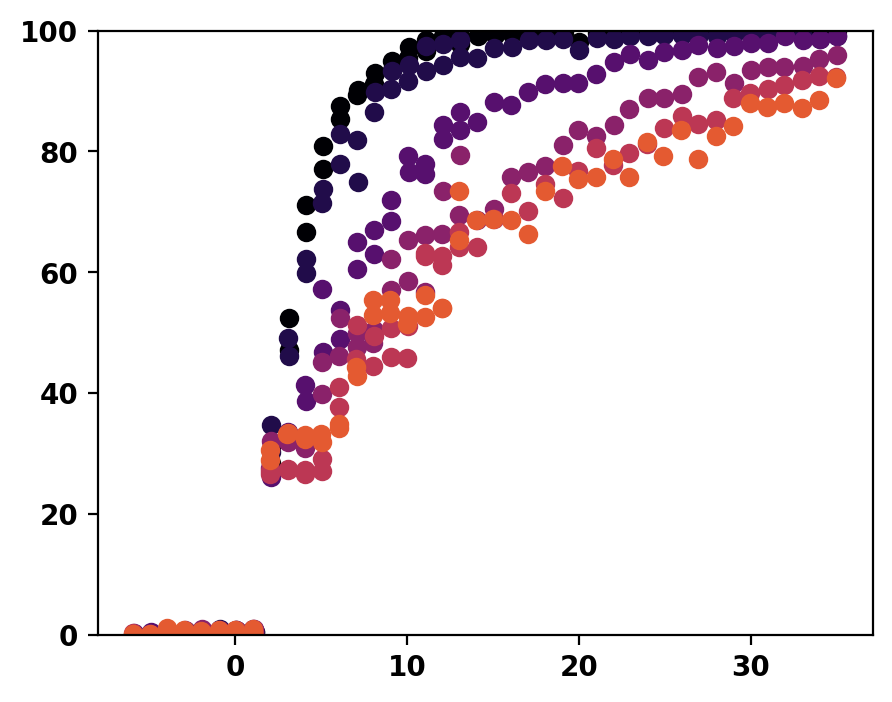

In [5]:
evenly_spaced_interval = np.linspace(0, 1,9)
thresh1 = 0.5
thresh2 = 0.5
thresh_mc = 10
thresh_mn = 200
thresh_fp = [10, 200,50,100]
# fps = ['mCerulean','mNeonGreen','SSC-HLin']
fps = ['GRN-V-HLin','GRN-B-HLin','SSC-HLin']
colors = [plt.cm.inferno(x) for x in evenly_spaced_interval]
fig, (ax1) = plt.subplots(1,1,figsize=(5, 4), dpi=200, facecolor='w', edgecolor='k')
inds = [30,60,120,180,240,300]
rec_fraction = {}
rec_fraction1 = {}
for jj,rid in enumerate([1,2,3,4,5,6]):

    t1,rec_fraction[inds[jj]]= rec_fractions(all_data1[rid],t_shift = 6.8,t_del = [])
    t2,rec_fraction1[inds[jj]]= rec_fractions(all_data[rid], t_shift = 9,t_del = [])
    ax1.scatter(t1,rec_fraction[inds[jj]]*100,color = colors[jj])
    ax1.scatter(t2,rec_fraction1[inds[jj]]*100,color =colors[jj])

ax1.set_ylim(0,100)
rec_fraction[60]= np.delete(rec_fraction[60],13) #erroneous tp
rec_fraction[30]= np.delete(rec_fraction[30],13) #erroneous tp


In [6]:
start =8
start1 = 6
inds =[30,60,120,180,240,300]
gaps= [1,1,3,4,5,6]
gaps = {ind:gap for ind,gap in zip(inds,gaps)}
recp_fraction ={}
recp_fraction1 ={}
for ind,gap in gaps.items() :
    print(ind)
    xx =round(len(rec_fraction[ind])/gap)
    blast =[i*gap for i in range(xx+3)]
    listt =[np.mean(rec_fraction[ind][0:start-1])]+ [np.mean(rec_fraction[ind][start+k:start+k+gap]) for k in blast]
    recp_fraction[ind] = np.asarray(listt)
    recp_fraction[ind]= recp_fraction[ind][~np.isnan(recp_fraction[ind])]
    
    blast1 =[i*gap for i in range(round(len(rec_fraction1[ind])/gap)+3)]
    listt =[np.mean(rec_fraction1[ind][0:start1-1])]+ [np.mean(rec_fraction1[ind][start1+k:start1+k+gap]) for k in blast]
    recp_fraction1[ind] = np.asarray(listt)
    recp_fraction1[ind]= recp_fraction1[ind][~np.isnan(recp_fraction1[ind])]
    

30
60
120
180
240
300


C:\Users\lifeware\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lifeware\miniconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
recp_fraction1[60]

array([0.00710862, 0.34682659, 0.49055641, 0.62125341, 0.71492604,
       0.77824463, 0.81818182, 0.86598441, 0.90368664, 0.91609294,
       0.93319058, 0.9427238 , 0.95698925, 0.95490841, 0.9703173 ,
       0.97295013, 0.98416887, 0.98471223, 0.98611111, 0.96733212,
       0.98763736, 0.98571429, 0.99060823])

In [8]:
pulse_fractions = {}
for ind in [30,60,120,180,240,300]:
    duda = [(recp_fraction[ind][i+1]-recp_fraction[ind][i])/(1-recp_fraction[ind][i]) for i in range(len(recp_fraction[ind])-1)]
    duda =np.asarray(duda)
    duda = duda.ravel()
    if ind ==30:
        duda = duda[0:7]
    if ind ==60:
        duda = duda[0:7]
    pulse_fractions[ind] = duda
pulse_fractions1 = {}
for ind in [30,60,120,180,240,300]:
    duda = [(recp_fraction1[ind][i+1]-recp_fraction1[ind][i])/(1-recp_fraction1[ind][i]) for i in range(len(recp_fraction1[ind])-1)]
    duda =np.asarray(duda)
    duda = duda.ravel()
    if ind ==30:
        duda = duda[0:7]
    elif ind ==60:
        duda = duda[0:7]
    pulse_fractions1[ind] = duda


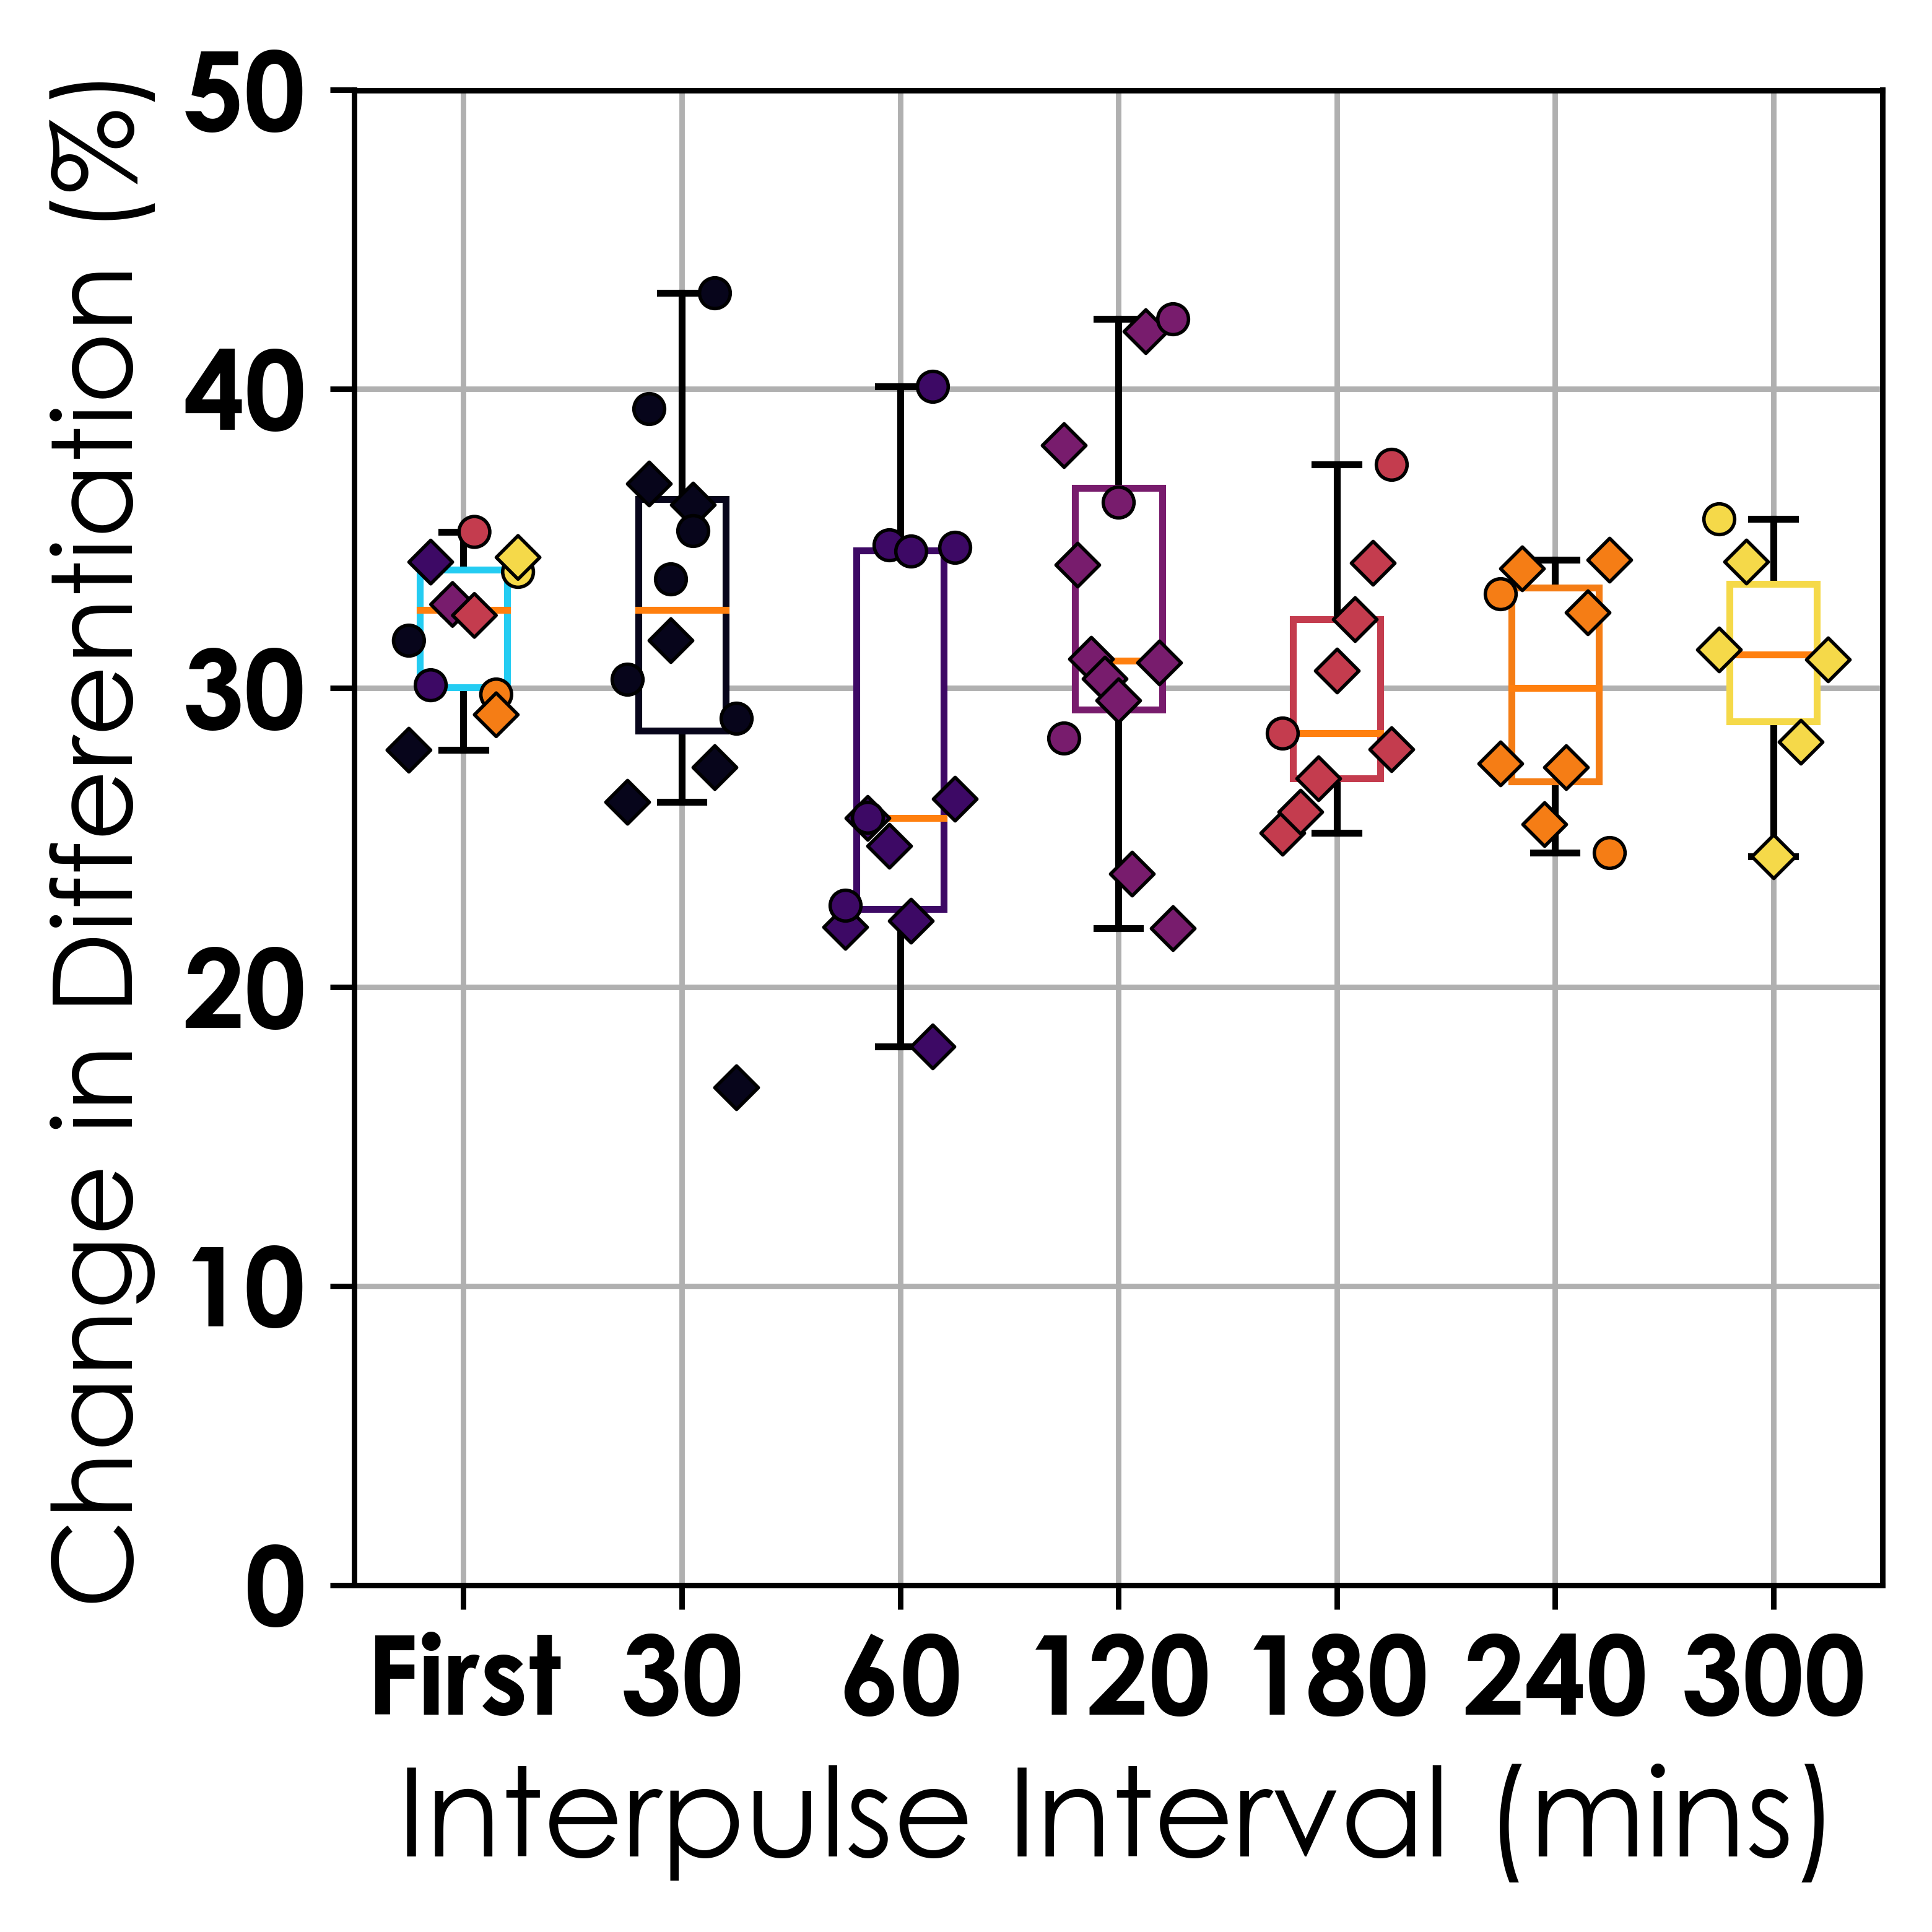

In [9]:
goos = [2,3,4,5,6,7,1]
evenly_spaced_interval = np.linspace(0, 1,22)
fs =18
colorsi = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colors =[colorsi[1],colorsi[4],colorsi[7],colorsi[11],colorsi[15],colorsi[19]]
tickls =[str(i) for i in goos]

sz = 20
mean = []
mean1 = []
fig, ax1 = plt.subplots(1,1,figsize=(4,4),dpi = 800)
first_pulse = []
first_pulse1 = []

for jj,values2 in enumerate( pulse_fractions1.items()):
    indu = values2[0]
    values1 = values2[1][1:]
    values = pulse_fractions[indu][1:]
    first_pulse1.append(values2[1][0])
    first_pulse.append(pulse_fractions[indu][0])
    col = 'k'
    ax1.scatter(np.linspace(goos[jj]-0.25,goos[jj]+0.25,len(values1)),values1*100,zorder = 1000,edgecolor = col,lw = 0.5,s = sz,color = colors[jj],marker = 'D')
    ax1.scatter(np.linspace(goos[jj]-0.25,goos[jj]+0.25,len(values)),values*100,zorder = 1000,edgecolor = col,lw = 0.5,s = sz,color = colors[jj])
    valuesb = np.insert(values,0,values1)
    bplot1 =ax1.boxplot(valuesb.transpose()*100, whis=1.5, showfliers=False,positions = [goos[jj]],widths = [0.4],patch_artist=True)
    for bplot in [bplot1]:
        for patch in bplot['boxes']:
            patch.set_edgecolor(colors[jj])
            patch.set_facecolor('w')

    mean1.append(np.mean(values1))
jj = -1
ax1.scatter(np.linspace(goos[jj]-0.25,goos[jj]+0.25,len(first_pulse)),np.asarray(first_pulse)*100,zorder = 1000,edgecolor = col,lw = 0.5,s = sz,c =colors)
ax1.scatter(np.linspace(goos[jj]-0.25,goos[jj]+0.25,len(first_pulse1)),np.asarray(first_pulse1)*100,zorder = 1000,edgecolor = col,lw = 0.5,s = sz,c = colors,marker = 'D')

bplot1 =ax1.boxplot(np.asarray(first_pulse+first_pulse1).transpose()*100, whis=1.5, showfliers=False,positions = [goos[jj]],widths = [0.4],patch_artist=True)
for bplot in [bplot1]:
    for patch in bplot['boxes']:
        patch.set_edgecolor('#24ccf2')
        patch.set_facecolor('w')
inds = ['First',30,60,120,180,240,300]

yticks = [0,10,20,30,40,50]
ax1.set_ylabel('Change in Differentiation (%)',fontsize = fs-2,**cgfont)
ax1.set_xlabel('Interpulse Interval (mins)',fontsize = fs,**cgfont)

ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xticklabels(inds,fontsize = fs-2,**cgfont)
ax1.set_yticks(yticks) 
ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)
ax1.grid(True)
fig.tight_layout()

plt.savefig('../plots' +'/Figure2e.eps',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2e.png',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2e.svg',bbox_inches = 'tight')

In [10]:
dis = {}
pulses = [0,1,2,3,4,6]
inds = [30,60,120,180,240,300]
for pulse in pulses:
    tmp = []
    for ind in inds:
        try:
            tmp.append(recp_fraction[ind][pulse])
            tmp.append(recp_fraction1[ind][pulse])
        except:
            pass
    dis[pulse] = (np.mean(tmp),np.std(tmp))
    
djpulses = np.asarray([dis[pulse][0] for pulse in pulses])*100
djpulses_std = np.asarray([dis[pulse][1] for pulse in pulses])*100


In [13]:
#from notebook 4_Model fitting and validaton Dual(Figure 2d )
cont_pulses = pd.read_csv('../processed_data' +'/cont_pulse_data.csv')


In [14]:
def objective(x,a,b,c):
    return a*x+b
popt, _ = scipy.optimize.curve_fit(objective, djpulses, cont_pulses['Mean'])
print(popt)
a, b, c = popt
y_new = objective(np.asarray(djpulses), a, b, c)

[1.08515345 0.54096638 1.        ]


C:\Users\lifeware\miniconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


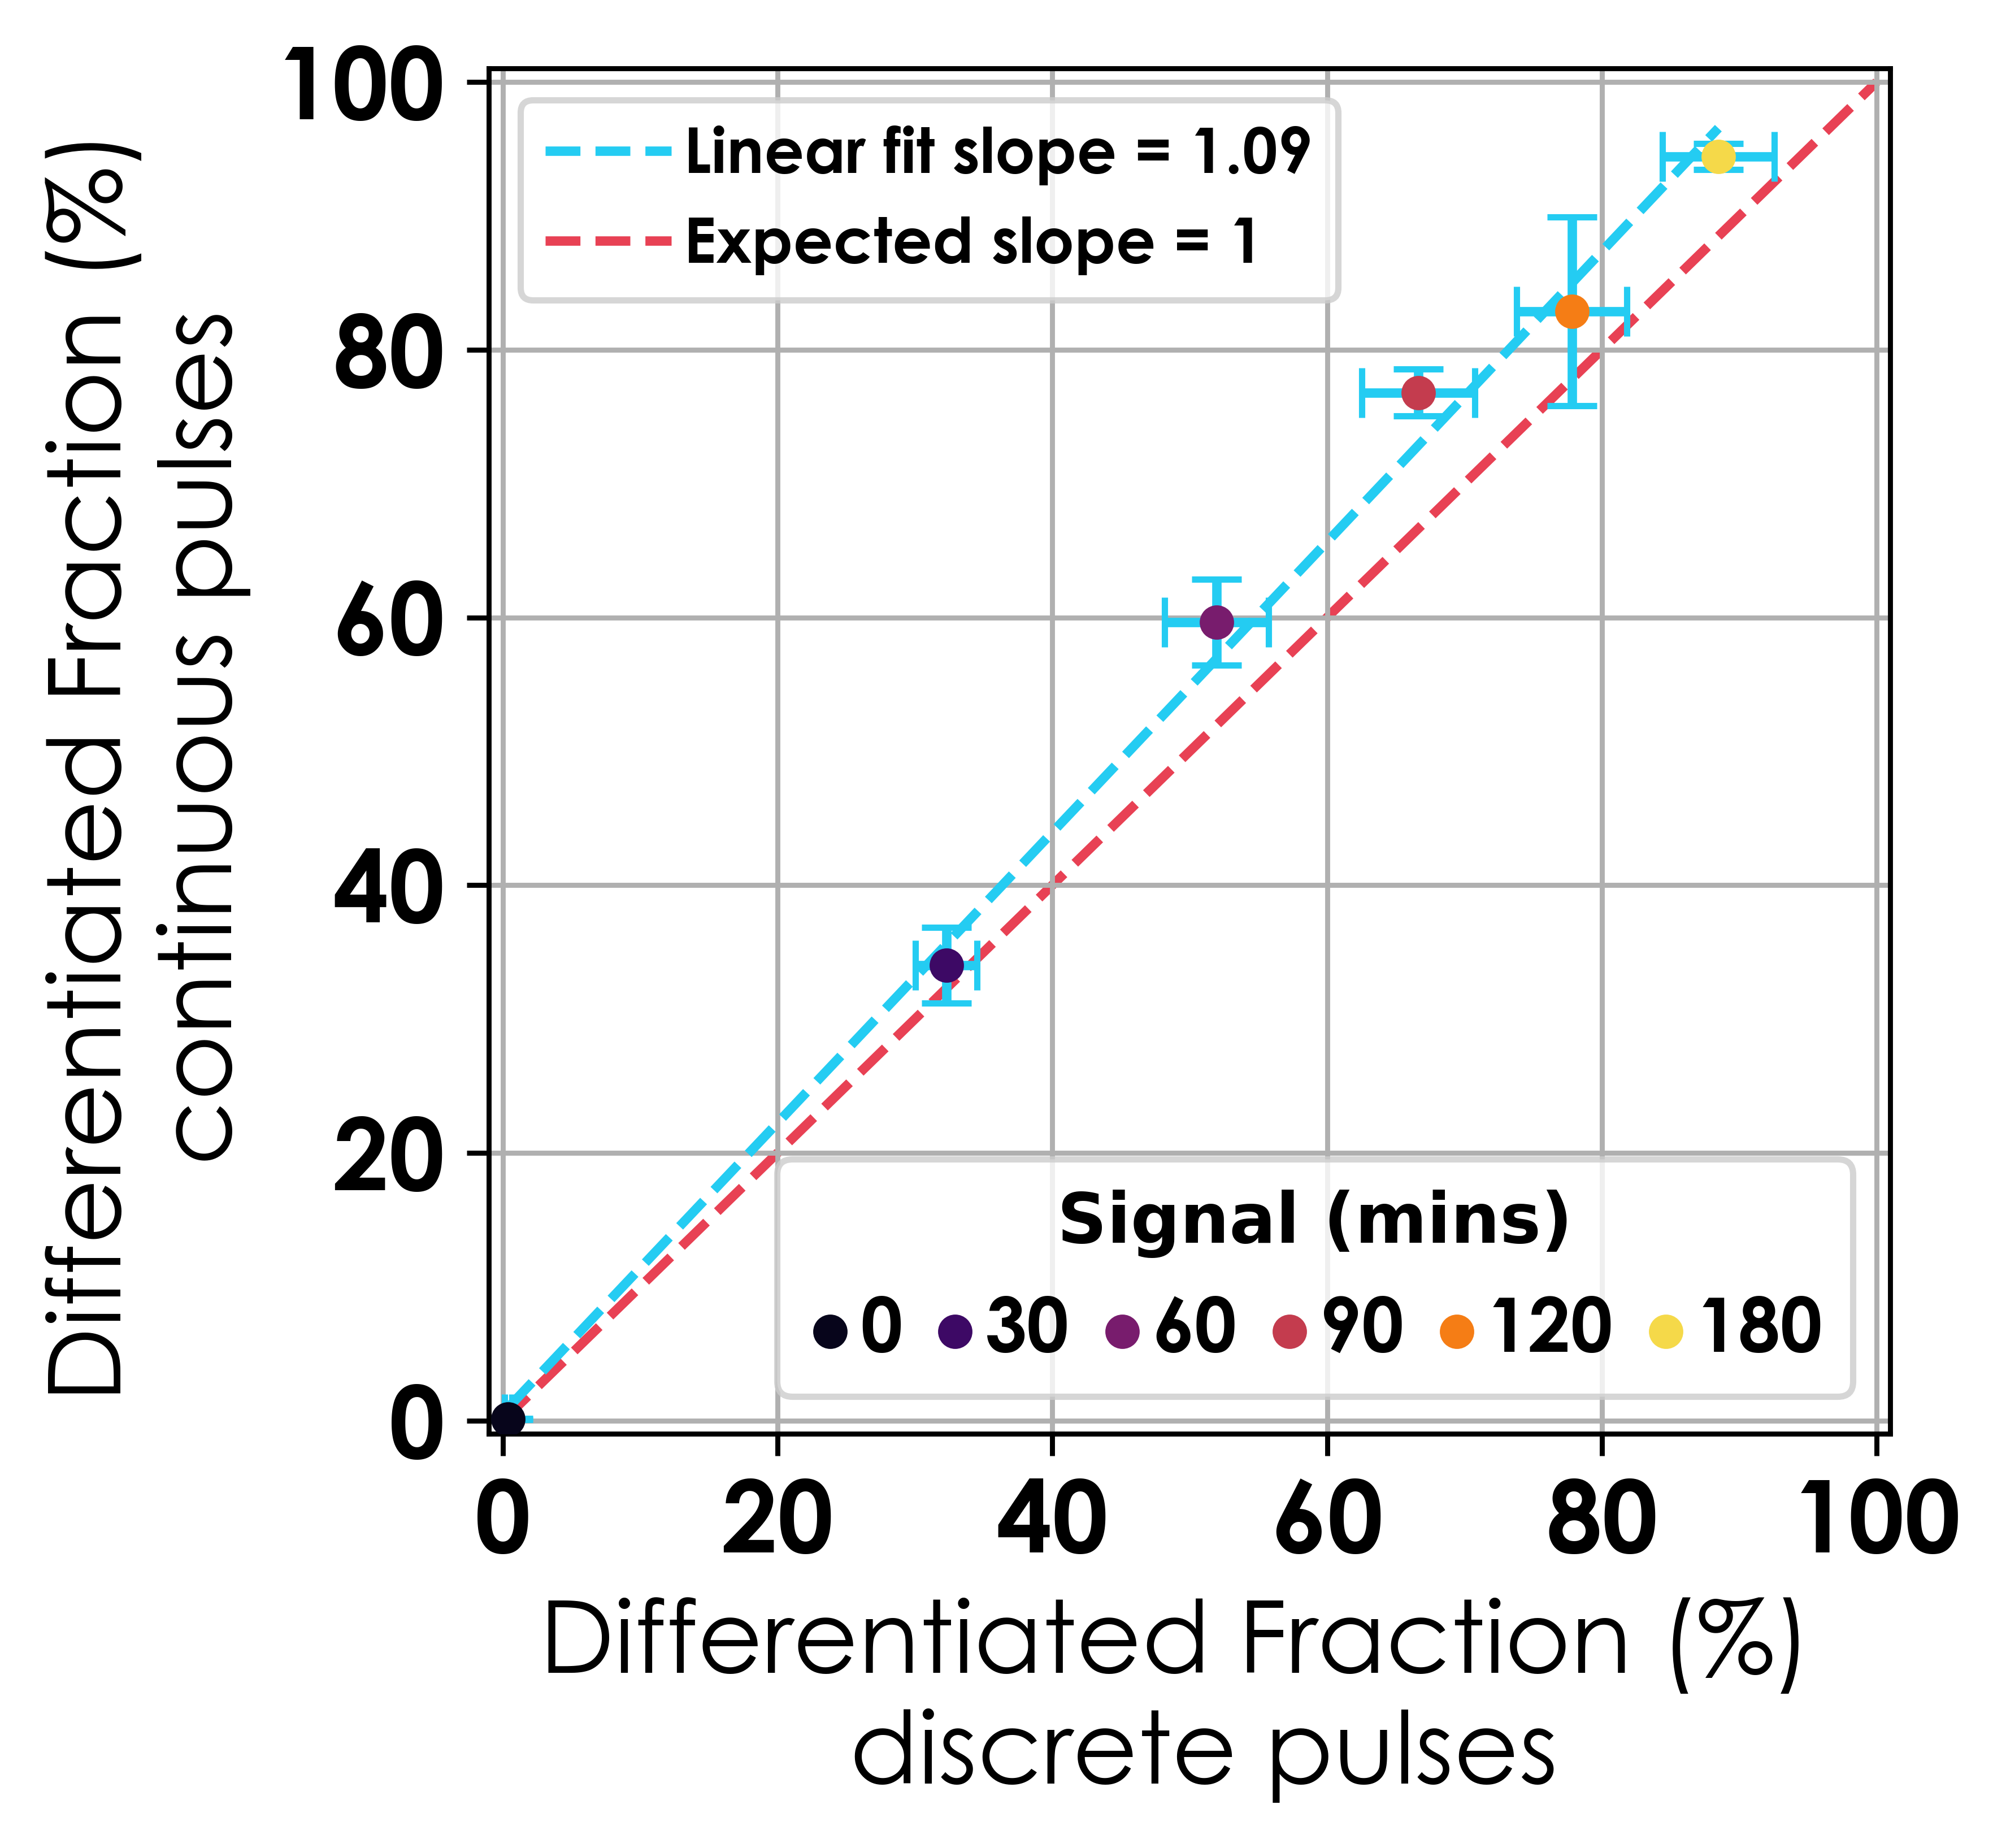

In [15]:
fig, ax1 = plt.subplots(1,1, figsize = (4,4), dpi = 800)
evenly_spaced_interval = np.linspace(0, 1,22)
fs = 18

colorsi = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colors =[colorsi[1],colorsi[4],colorsi[7],colorsi[11],colorsi[15],colorsi[19]]
labi = [0,30,60,90,120,180]
for jj in range(len(djpulses)):
    ax1.scatter(djpulses[jj],cont_pulses['Mean'][jj], color =colors[jj],s = 20, label = str(labi[jj]),zorder = 100)

    ax1.errorbar(djpulses[jj],cont_pulses['Mean'][jj],xerr = djpulses_std[jj], yerr= cont_pulses['SD'][jj],color ='#24ccf2',capsize = 4,linestyle = 'None')

L1 =ax1.legend(title='Signal (mins)',ncol = 6,fontsize=fs-6,loc = 'lower right',columnspacing = 0.4,title_fontsize = fs-7,handlelength = 0.6,handletextpad = 0.1)
plt.setp(L1.texts, **cgfont)

monica, = ax1.plot(djpulses,y_new,ls = '--',color ='#24ccf2')
ruby, = ax1.plot([0,10,100],[0,10,100],'#e84154',ls = '--',zorder=-10)

    
ax1.set_ylim(-1,101)
ax1.grid(True)
ax1.set_xlim(-1,101)
ax1.set_ylabel('Differentiated Fraction (%) \n continuous pulses', fontsize=fs-2,**cgfont)
ax1.set_xlabel('Differentiated Fraction (%) \n discrete pulses', fontsize=fs-2,**cgfont)
xticks = [0,20,40,60,80,100]
yticks = [0,20,40,60,80,100]
ax1.set_xticks(xticks) 
ax1.set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
ax1.set_yticks(yticks) 
ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)


L2 = ax1.legend([monica,ruby],['Linear fit slope = %0.2f' %a,'Expected slope = 1'],ncol =1, loc='upper left',columnspacing = 0.5,handlelength = 2,handletextpad = 0.2,fontsize=fs-8)
plt.setp(L2.texts, **cgfont)
ax1.add_artist(L1)

plt.savefig('../plots' +'/Figure2f.eps',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2f.png',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2f.svg',bbox_inches = 'tight')

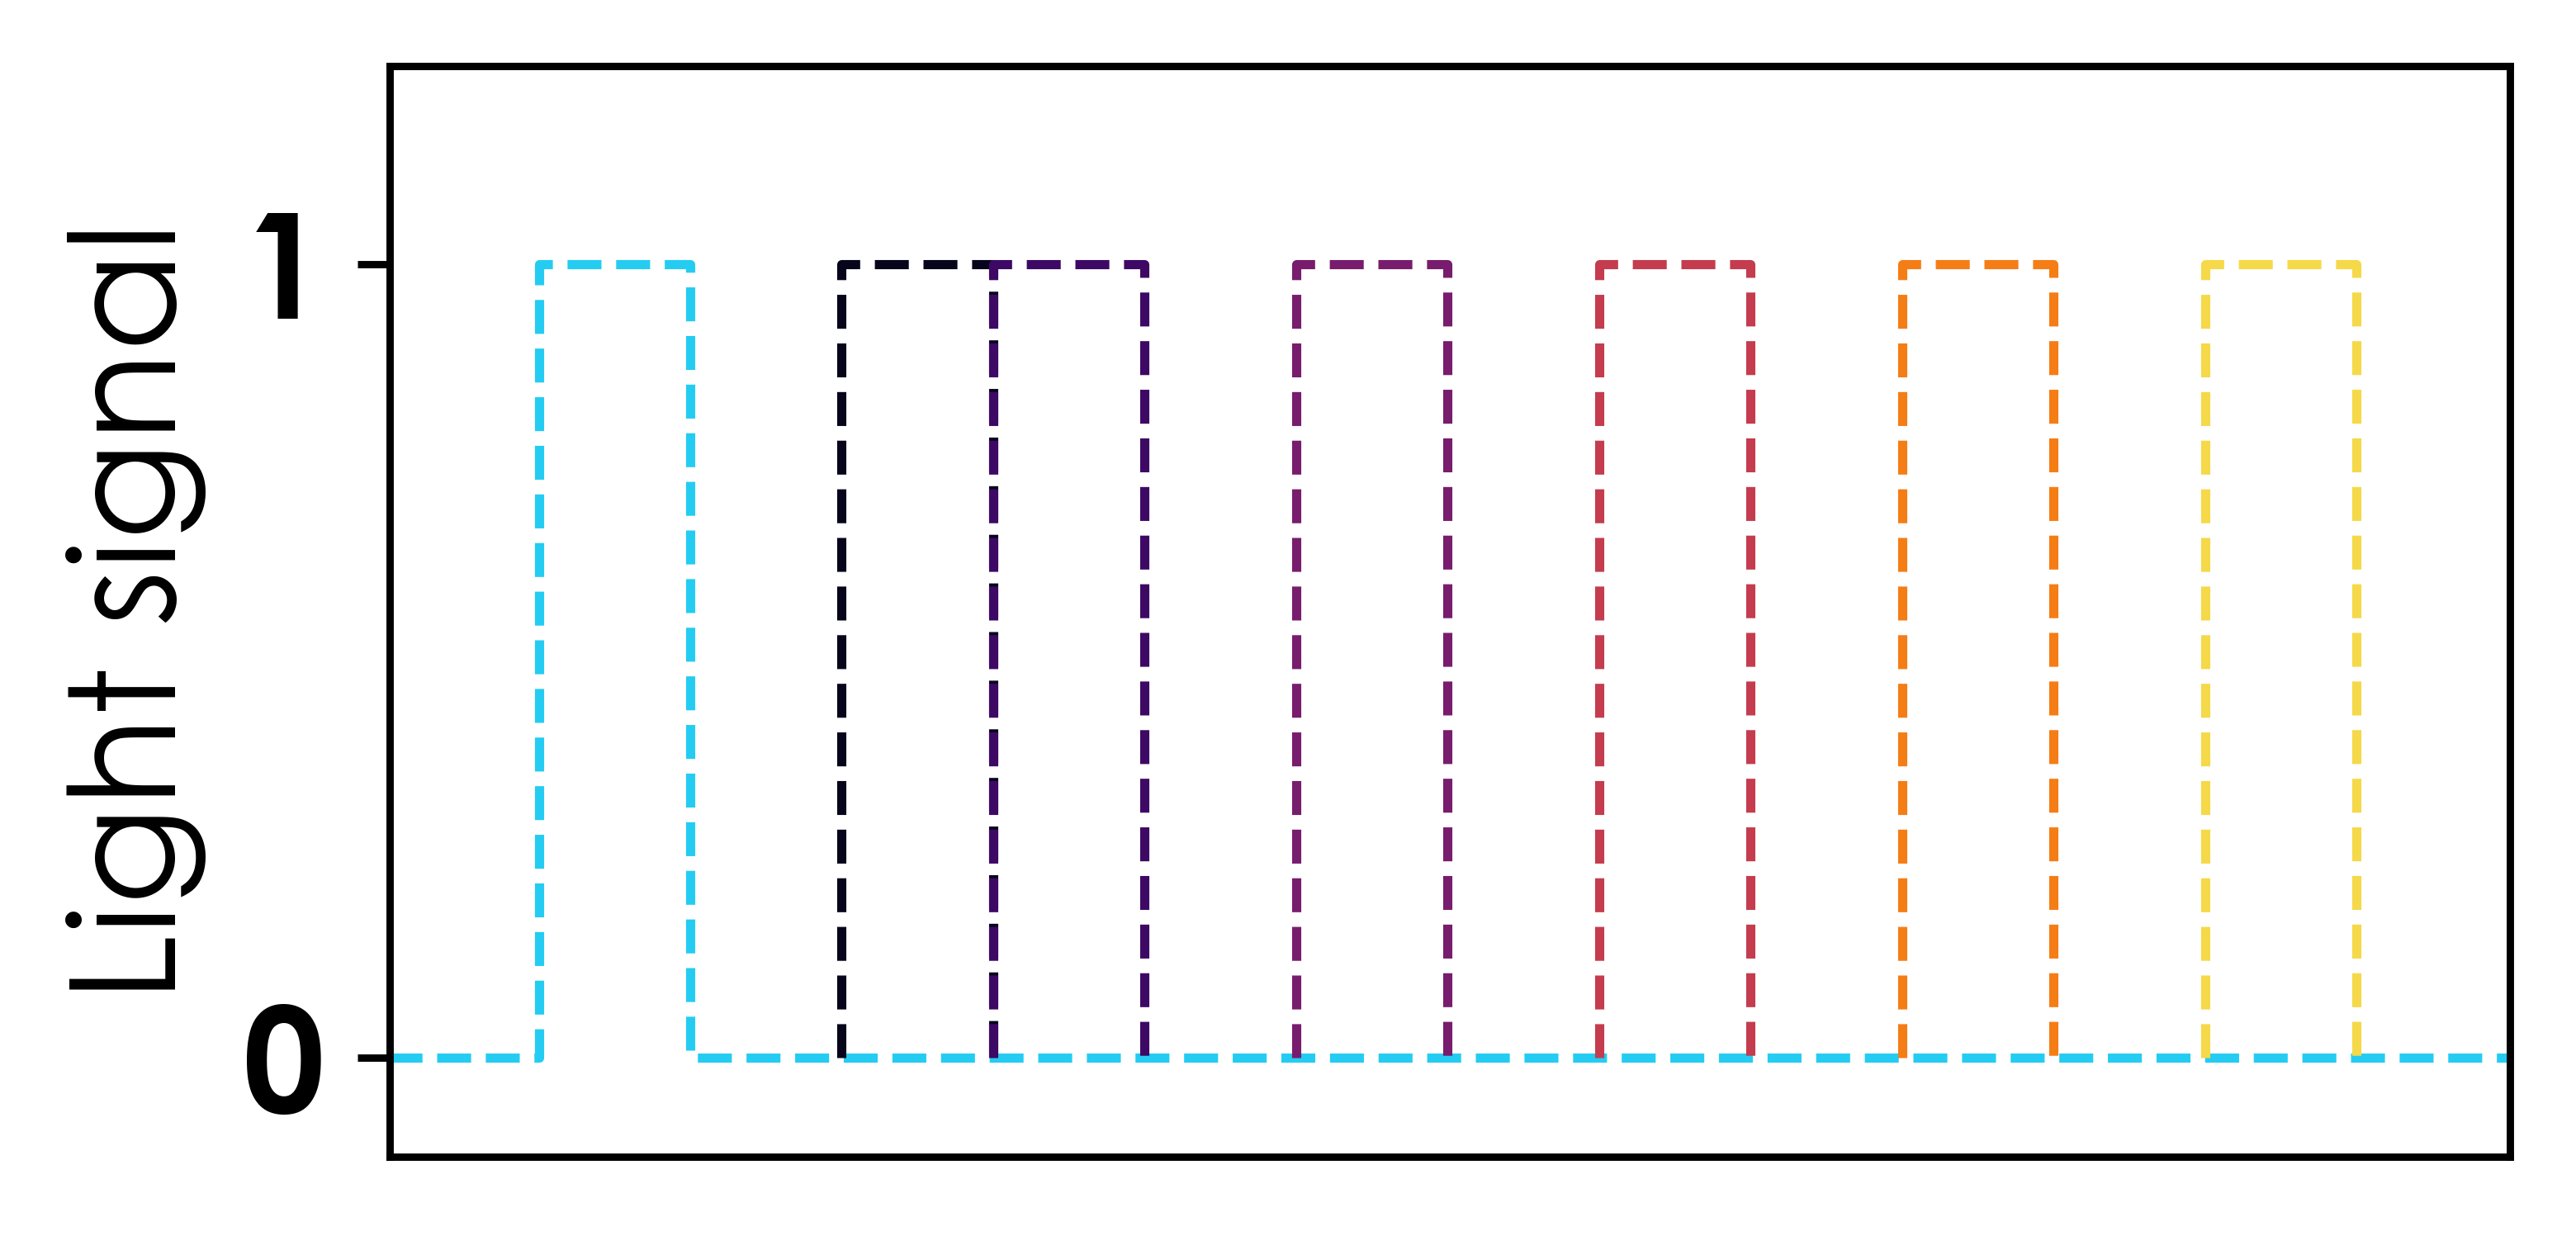

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(4,2),dpi = 800)
evenly_spaced_interval = np.linspace(0, 1,22)
lw=1
ls ='--'
colorsi = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colors =[colorsi[1],colorsi[4],colorsi[7],colorsi[11],colorsi[15],colorsi[19]]
df_leds = all_data[6].data_to_df('LEDs')
puls = df_leds.loc[(df_leds['rel_time_hrs']>-1) &(df_leds['rel_time_hrs']<23)]
time_b = np.asarray(puls['rel_time_hrs'])
signal_b = [ 0.,  0., 40., 40.,  0.,  0., 0, 0,  0.,  0., 0, 0,0.]
ax1.plot(time_b,signal_b,color = '#24ccf2',lw =lw,ls =ls)
for rid in [1,2,3,4,5,6]:
    df_leds = all_data[rid].data_to_df('LEDs')
    if rid ==1:
        puls = df_leds.loc[(df_leds['rel_time_hrs']>9.5) &(df_leds['rel_time_hrs']<10.5)]
    elif rid ==2:
        puls = df_leds.loc[(df_leds['rel_time_hrs']>9.5) &(df_leds['rel_time_hrs']<11.5)]
    elif rid ==3:
            puls = df_leds.loc[(df_leds['rel_time_hrs']>10) &(df_leds['rel_time_hrs']<12)]
    elif rid ==4:
            puls = df_leds.loc[(df_leds['rel_time_hrs']>11) &(df_leds['rel_time_hrs']<14)]
    elif rid ==5:
            puls = df_leds.loc[(df_leds['rel_time_hrs']>12) &(df_leds['rel_time_hrs']<15)]
    elif rid ==6:
            puls = df_leds.loc[(df_leds['rel_time_hrs']>13) &(df_leds['rel_time_hrs']<16)]

    else:
        
        print('hha')
    ax1.plot(puls['rel_time_hrs'],puls['intensity'],color = colors[rid-1],lw =lw,ls=ls)
xticks = [8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15]
ax1.set_xlim(8.5,15.5)
ax1.set_xticks([])
xticklabels =[ '0','','1','','2','','3','','4','','5','','6','','7'] 
xticklabels =[]
ax1.set_xticklabels(xticklabels,fontsize = fs-2,**cgfont)
ax1.set_ylim(-5,50)
ax1.set_yticks([0,40])
ax1.set_yticklabels(['0','1'], fontsize=fs-2,**cgfont)
ax1.set_ylabel('Light signal',fontsize = fs-2,**cgfont)
ax1.set_xlabel('',fontsize = fs,**cgfont)

fig.tight_layout()
plt.savefig('../plots' +'/Figure2a_bottom.eps',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2a_bottom.png',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2a_bottom.svg',bbox_inches = 'tight')

In [17]:
def model(t,y,params,u):
    g = y[0]
    p = y[1]
    
    dgdt = g *(-params[0]*u)
    dpdt = g *(params[0]*u)
    
    dydt = [dgdt,dpdt]
    return dydt

In [18]:
def rec_data(data,t_del,thresh1 =0.5,thresh2 = 0.5):
    df_ODs = data.data_to_df('ODs')
    n_events = 5000
    thresh_af = 10
    thresh_af_g = 100
    thresh_fp = [10, 100,50,100]
    t0 = df_ODs['time_s'].iloc[0]
    for df in [df_ODs, data.cells]:
        df['rel_time_hrs'] = (df['time_s'] - t0) / 3600.
    fps = ['mCerulean','mNeonGreen','mVenus','mScarletI','SSC-HLin']
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    t_del = sorted(t_del, reverse=True)
#     print(t_del)
    t = np.delete(t,t_del)
    rec_frac_count = np.zeros(np.size(t),dtype=float)

    for jj in range(0,np.size(t)):
            lk = gk.get_group(t[jj])
            if (lk.size)/26 < n_events/100:
                print('Wear shirts  next time')
            else:
                sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
                dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
                db_lk = dbf_lk.loc[(dbf_lk[fps[0]] > thresh_af) |(dbf_lk[fps[1]] > thresh_af_g) ]
                rec_frac_count[jj] = db_lk.loc[(((db_lk[fps[1]]/db_lk[fps[4]])*np.mean(db_lk[fps[4]]))>thresh_fp[1])][fps[1]].count()/db_lk[fps[1]].count()
                
    return(t,rec_frac_count.flatten()*100)

def fitted_data(data,get_data=rec_data,t_del=[],thresh1=0.5,thresh2=0.5):
    t,rec_frac = get_data(data,t_del,thresh1 =thresh1,thresh2 = thresh2)
    
    t_span = []
    ol_tp = 0
    u = 0
    for jj,tp in enumerate(data.LEDs_changes['rel_time_hrs']):
        if tp<np.max(t):
            t_span.append((ol_tp,tp,u))
            ol_tp = tp
            u = data.LEDs_changes['intensity'][jj]/40
        else:
            pass
    t_span.append((ol_tp,np.max(t),u))
    
    
    return(t,rec_frac,t_span)

In [19]:
def fitting(params,inits,t_data,t_span,model):
    
    # solve ODE
    z0 = inits
    g = []
    p=[]
    nt = []
    t_fit = []
    for count,tuples in enumerate(t_span):
        t_eval = []
        tspan = (tuples[0],tuples[1])
        for tp in t_data:
            if ((tp>tuples[0]) and (tp<tuples[1])):
                t_eval.append(tp)
                t_fit.append(tp)
        t_eval.append(tuples[1])
        t_fit.append(tuples[1])
        u = tuples[2]
        
        z = solve_ivp(model,tspan,np.asarray(z0),t_eval = t_eval,args=(params,u))
        if count !=len(t_span)-1:
        # store solution for plotting
            nt.append(z.y[0] +z.y[1])
            g.append(z.y[0])
            p.append(z.y[1])
        else:
            nt.append(z.y[0] +z.y[1])
            g.append(z.y[0])
            p.append(z.y[1])
        z0 = [z.y[0][-1],z.y[1][-1]]
            ########################## Calculating fractions and plotting them with growth rate on the other axis #################   
    nr = np.concatenate(p, axis=0 )/np.concatenate( nt, axis=0 )
    return(nr*100,t_fit)


(1.0, 0.0)
(0.9931253305129562, 0.006874669487043892)
(1.0, 0.0)
(0.9987146529562981, 0.0012853470437017994)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


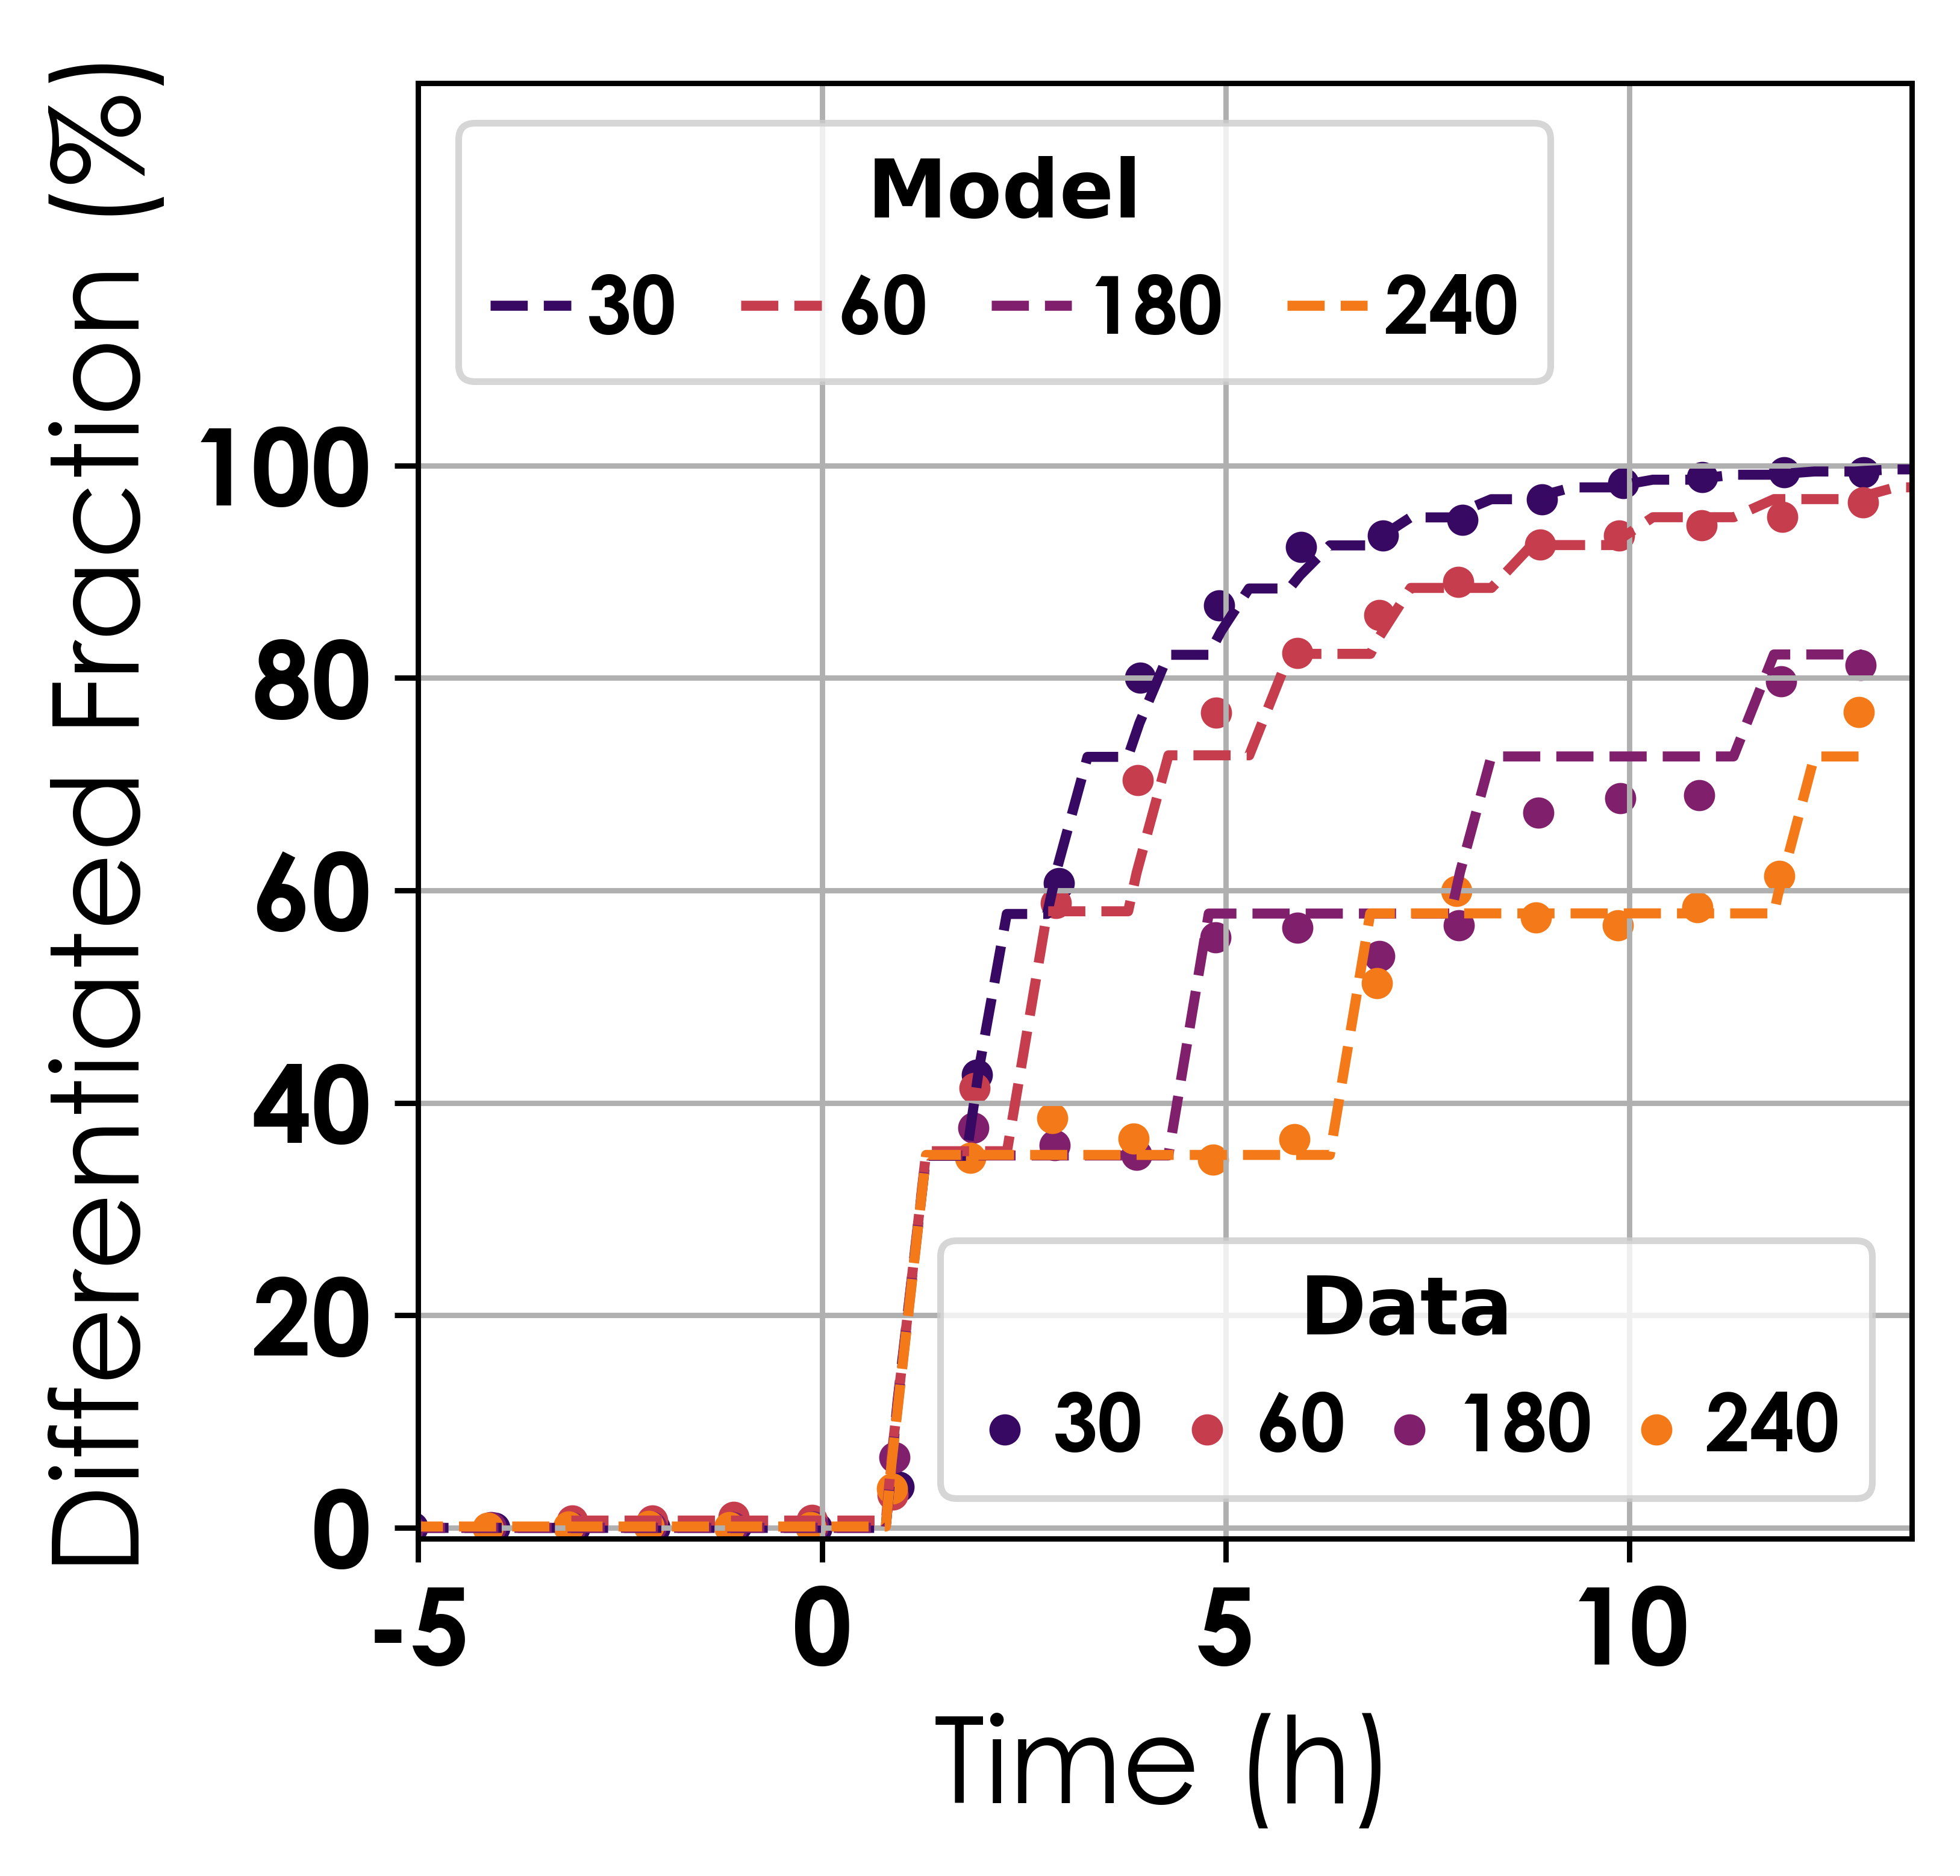

In [20]:
fig, ax1 = plt.subplots(1,1,figsize =(4,4),dpi = 800)
evenly_spaced_interval = np.linspace(0, 1,18)
n_rec =1
sz = 10
params2 = [0.86234813]
cols = [plt.cm.inferno(x) for x in evenly_spaced_interval]
col = [cols[3],cols[6],cols[6],cols[12],cols[9]]
labi = [30,60 ,180,240  ]
# labi = ['30 mins','60 mins','120','180 mins','240 mins','300']

simplots = [i for i in range(4)]

for jj,rid in enumerate([1,2,4,6]):
    ts = 7
    if jj ==1:
        ts =9.2
        data = all_data[2]
        t_data,bg,t_span = fitted_data(data)
        df_leds = data.data_to_df('LEDs')
        z0= ((100-bg[0])/100,bg[0]/100)
        print(z0)
        S,t_fit = fitting(params2,z0,t_data,t_span,model)
        ax1.scatter(t_data[1:]-ts,bg[1:],color = col[jj+3],label=labi[jj], lw =1.5,s=sz)
        simplots[jj], = ax1.plot(np.asarray(t_fit)[:-1]-ts +n_rec*1,S[:-1],color = col[jj+3],linestyle = '--', lw =1.5)
        continue
    data = all_data1[rid]
    t_data,bg,t_span = fitted_data(data)
    df_leds = data.data_to_df('LEDs')
    z0= ((100-bg[0])/100,bg[0]/100)
    print(z0)
    S,t_fit = fitting(params2,z0,t_data,t_span,model)
    ax1.scatter(t_data[1:]-ts,bg[1:],color = col[jj],label=str(labi[jj]), lw =1.5,s=sz)
    simplots[jj], = ax1.plot(np.asarray(t_fit)[:-1]-ts +n_rec*1,S[:-1],color = col[jj],linestyle = '--', lw =1.5)
L1 =ax1.legend(title='Data',ncol = 4,fontsize=fs-6,loc = 'lower right',columnspacing = 0.4,title_fontsize = fs-6,handlelength = 0.8,handletextpad = 0.2)
plt.setp(L1.texts, **cgfont)
L1._legend_box.align = "center"
L2 = ax1.legend([s for s in simplots],[str(i) for i in labi ],title='Model',ncol =4,fontsize=fs-6, loc='upper left',title_fontsize = fs-6,columnspacing = 0.8,handlelength = 1,handletextpad = 0.2)
plt.setp(L2.texts, **cgfont)

ax1.add_artist(L1)

ax1.set_ylim(-1,136)
ax1.grid(True)
ax1.set_ylabel('Differentiated Fraction (%)', fontsize=fs,**cgfont)
ax1.set_xlabel('Time (h)', fontsize=fs,**cgfont)
xticks = [-5,0,5,10,15]
yticks = [0,20,40,60,80,100]
ax1.set_xticks(xticks) 
ax1.set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
ax1.set_yticks(yticks) 
ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)
ax1.set_xlim(-5, 13.5)

plt.savefig('../plots' +'/Figure2g.eps',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2g.png',bbox_inches = 'tight')
plt.savefig('../plots'+'/Figure2g.svg',bbox_inches = 'tight')